This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.06961598,  0.17770955,  0.03415343, -0.1490375 ,  0.05456194,
          0.04047889, -0.00976902,  0.05629355, -0.16144347,  0.1354262 ,
          0.20935857, -0.03650799,  0.06618842,  0.2650057 ,  0.102451  ,
          0.04244494,  0.03335777, -0.26746184,  0.20959932, -0.00105929,
         -0.2689624 , -0.23819524,  0.22910136,  0.1587379 ,  0.07596803,
          0.00285006, -0.1886217 , -0.12424241,  0.25567174,  0.07668015,
          0.09301266,  0.25344062, -0.23074856,  0.05573019, -0.11130355,
          0.29011297, -0.18544245, -0.06141622, -0.1707742 ,  0.00653177,
          0.29027617, -0.16626462,  0.04006642,  0.108843  ,  0.11216357,
          0.18680528,  0.1431168 ,  0.03262696,  0.2285496 , -0.04282537,
          0.16944143, -0.00267816, -0.19105515,  0.11743557, -0.2644127 ,
          0.18743578,  0.11457741, -0.13614324, -0.14218779,  0.12613711,
          0.02332133, -0.05697706,  0.08962

**The summary method**

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [54]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [55]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 2ms/step - loss: 24.2104 - priority_loss: 0.3304 - department_loss: 23.8801 - priority_mean_absolute_error: 0.5018 - department_accuracy: 0.0617


**Training a model by providing dicts of input & target arrays**

In [56]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 41.9852 - priority_loss: 0.3304 - department_loss: 41.6548 - priority_mean_absolute_error: 0.5018 - department_accuracy: 0.2844


#### The power of the Functional API: Access to layer connectivity

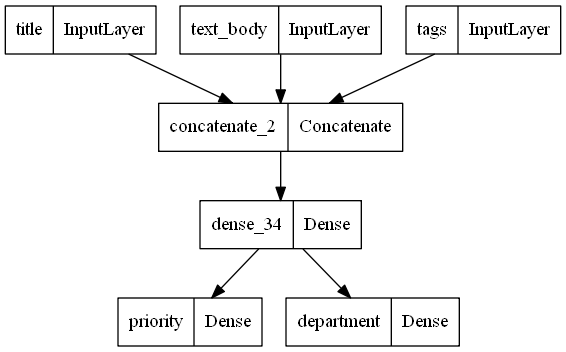

In [57]:
keras.utils.plot_model(model, "ticket_classifier.png")

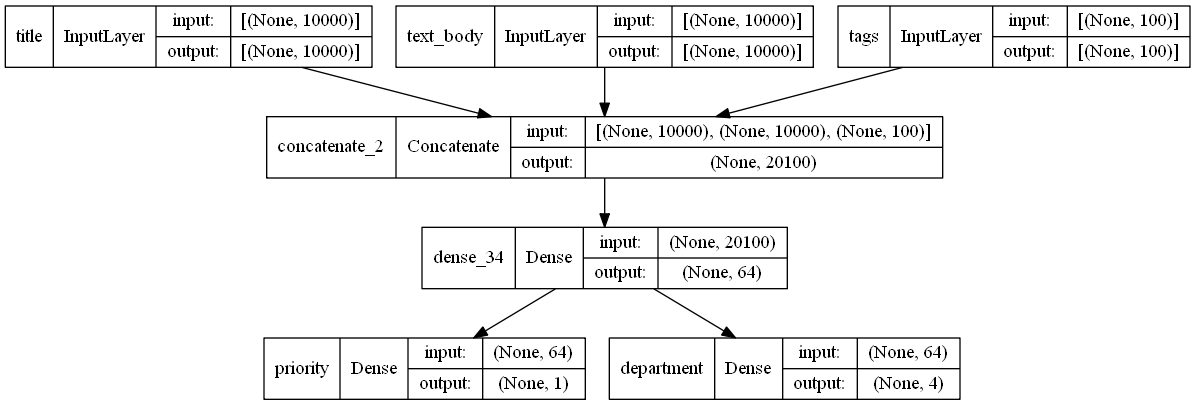

In [58]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [59]:
model.layers

In [69]:
for i in range(7):
  print(model.layers[i].input)

KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='text_body'), name='text_body', description="created by layer 'text_body'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='tags'), name='tags', description="created by layer 'tags'")
[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>, <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>, <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 20100), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_34/Relu:0', description="created by layer 'dense_34'")
KerasTensor(type_spec=Tens

In [70]:
for i in range(7):
  print(model.layers[i].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='title'), name='title', description="created by layer 'title'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10000), dtype=tf.float32, name='text_body'), name='text_body', description="created by layer 'text_body'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='tags'), name='tags', description="created by layer 'tags'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20100), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_34/Relu:0', description="created by layer 'dense_34'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='priority/Sigmoid:0', description="created by layer 'priority'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='department/Softmax:0', 

**Creating a new model by reusing intermediate layer outputs**

In [71]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

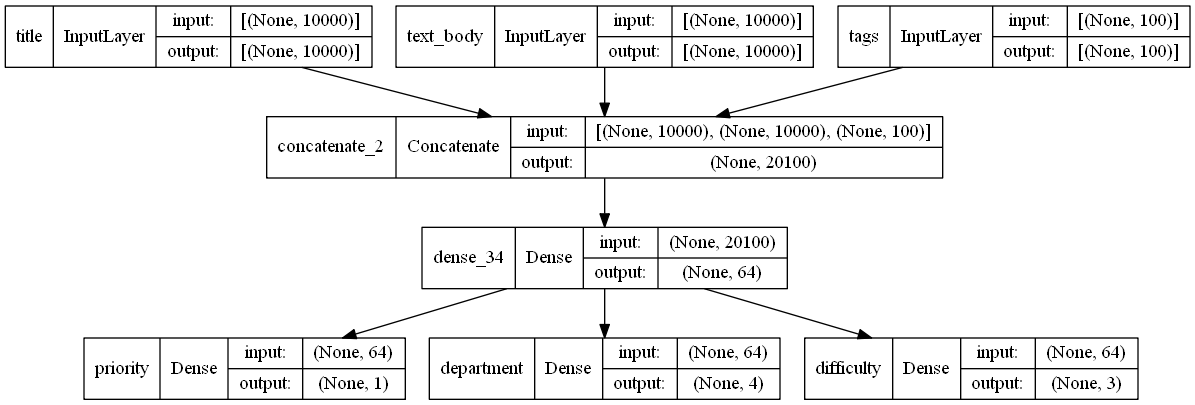

In [72]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [73]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [74]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [75]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 2ms/step - loss: 32.9314 - output_1_loss: 0.3267 - output_2_loss: 32.6047 - output_1_mean_absolute_error: 0.4982 - output_2_accuracy: 0.2836


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [77]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [78]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [79]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.9143 - val_loss: 0.1483 - val_accuracy: 0.9558
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1662 - accuracy: 0.9530 - val_loss: 0.1242 - val_accuracy: 0.9643
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9739


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [80]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [34]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.9130 - rmse: 7.1837 - val_loss: 0.1541 - val_accuracy: 0.9570 - val_rmse: 7.3620
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1644 - accuracy: 0.9531 - rmse: 7.3565 - val_loss: 0.1255 - val_accuracy: 0.9662 - val_rmse: 7.4048
Epoch 3/3
313/313 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9706 - rmse: 7.4346


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [35]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.9108 - val_loss: 0.1564 - val_accuracy: 0.9564
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1705 - accuracy: 0.9526 - val_loss: 0.1269 - val_accuracy: 0.9664
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1397 - accuracy: 0.9628 - val_loss: 0.1155 - val_accuracy: 0.9696
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1283 - accuracy: 0.9672 - val_loss: 0.1093 - val_accuracy: 0.9726
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9699 - val_loss: 0.1152 - val_accuracy: 0.9741
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1125 - accuracy: 0.9731 - val_loss: 0.1083 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1058 - accuracy: 0.9747 - val_loss: 0.1049 - val_accuracy:

In [36]:
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [37]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2939 - accuracy: 0.9117 - val_loss: 0.1393 - val_accuracy: 0.9592
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1640 - accuracy: 0.9532 - val_loss: 0.1169 - val_accuracy: 0.9668
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1360 - accuracy: 0.9632 - val_loss: 0.1095 - val_accuracy: 0.9734
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1230 - accuracy: 0.9682 - val_loss: 0.1164 - val_accuracy: 0.9721
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1180 - accuracy: 0.9703 - val_loss: 0.1065 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9731 - val_loss: 0.1110 - val_accuracy: 0.9747
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9751 - val_loss: 0.1065 - val_accuracy:

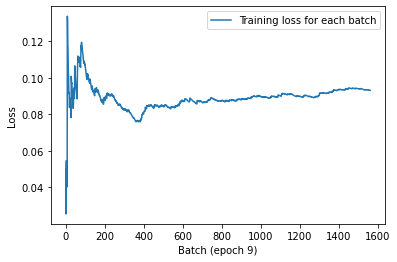

In [38]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [39]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2932 - accuracy: 0.9126 - val_loss: 0.1462 - val_accuracy: 0.9592
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1643 - accuracy: 0.9540 - val_loss: 0.1315 - val_accuracy: 0.9636
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1375 - accuracy: 0.9622 - val_loss: 0.1111 - val_accuracy: 0.9711
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1240 - accuracy: 0.9678 - val_loss: 0.1118 - val_accuracy: 0.9728
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9715 - val_loss: 0.0998 - val_accuracy: 0.9763
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9735 - val_loss: 0.1111 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9762 - val_loss: 0.1121 - val_accuracy:

In [40]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

Launching TensorBoard...

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [41]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [42]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [43]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [44]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [45]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9134
...loss: 0.2937
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9534
...loss: 0.1659
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9614
...loss: 0.1380


**Writing a step-by-step evaluation loop**

In [46]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1233


### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [47]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1233


### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [48]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [49]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2968
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1665
Epoch 3/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1388


In [50]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [51]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.9114
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1632 - sparse_categorical_accuracy: 0.9536
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1430 - sparse_categorical_accuracy: 0.9616


## Summary